In [1]:
import os
print(os.getcwd())
os.chdir('c:\Research\VotingParadoxes')
print(os.getcwd())
os.chdir('c:\Research\VotingParadoxes\src\college-polls\Pairwise')
print(os.getcwd())
import pandas as pd
import matplotlib.pyplot as plt

c:\Research\VotingParadoxes\src\college-polls\Pairwise
c:\Research\VotingParadoxes
c:\Research\VotingParadoxes\src\college-polls\Pairwise


This cell is going to run a script that contains how many 3 vs 4 vs 5 cycles

In [2]:
df_3 = pd.read_csv('all-cycles.csv')
threesize = len(df_3)
df_4 = pd.read_csv('4_cycle.csv')
foursize = len(df_4)
df_5 = pd.read_csv('5_cycle.csv')
fivesize = len(df_5)
size_list = [threesize, foursize, fivesize]
cycle_list = [3, 4, 5]

Now, to plot it

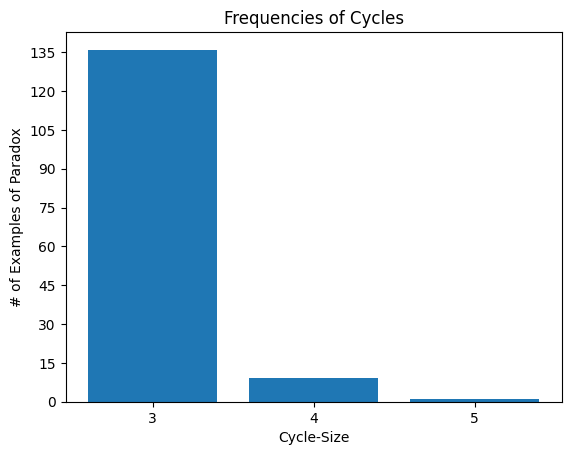

In [3]:
plt.bar(cycle_list, size_list)
plt.xlabel('Cycle-Size')
plt.ylabel('# of Examples of Paradox')
plt.title('Frequencies of Cycles')
#show only integers on axis
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.show()

Implement Cycles by Season counter

In [4]:
#create each individual dataframe
season_counter3 = df_3.groupby('Season').size().reset_index(name='Frequency')
season_counter3
season_counter4 = df_4.groupby('Season').size().reset_index(name='Frequency')
season_counter4
season_counter5 = df_5.groupby('Season').size().reset_index(name='Frequency')
season_counter5

,Season,Frequency
0,2021,1


Now, add these together

In [5]:
season_df_try_1 = pd.concat([season_counter3, season_counter4, season_counter5], ignore_index=True)
byseason = season_df_try_1.groupby('Season', as_index=False)['Frequency'].sum()
byseason

,Season,Frequency
0,2014,15
1,2015,7
2,2016,27
3,2017,9
4,2018,16
5,2019,4
6,2020,10
7,2021,22
8,2022,29
9,2023,5


Plot it

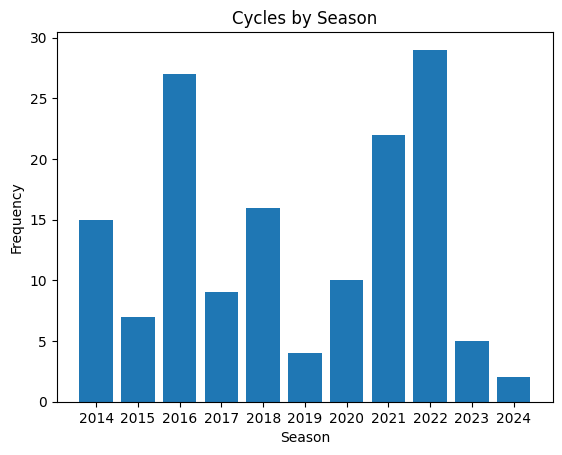

In [6]:
plt.bar(byseason['Season'], byseason['Frequency'])

plt.xlabel('Season')
plt.ylabel('Frequency')
plt.title('Cycles by Season')

#doesn't skip 2015,2017
plt.xticks(byseason['Season'])

plt.show()

Now, let's do by week

In [7]:
#create each individual dataframe
week_counter3 = df_3.groupby('Week').size().reset_index(name='Frequency')
week_counter3
week_counter4 = df_4.groupby('Week').size().reset_index(name='Frequency')
week_counter4
week_counter5 = df_5.groupby('Week').size().reset_index(name='Frequency')
week_counter5

,Week,Frequency
0,2,1


Add them together

In [8]:
weeks_try = pd.concat([week_counter3, week_counter4, week_counter5], ignore_index=True)
byweek = weeks_try.groupby('Week', as_index=False)['Frequency'].sum()
byweek
#fixes the missing row 14
row14 = pd.DataFrame({'Week': [14], 'Frequency': [0]})
byweek = pd.concat([byweek, row14], ignore_index=True)
byweek = byweek.sort_values(by='Week', ascending=True)
byweek

,Week,Frequency
0,1,7
1,2,13
2,3,11
3,4,12
4,5,11
5,6,14
6,7,11
7,8,16
8,9,7
9,10,7


Now, to plot our Cycles by Week

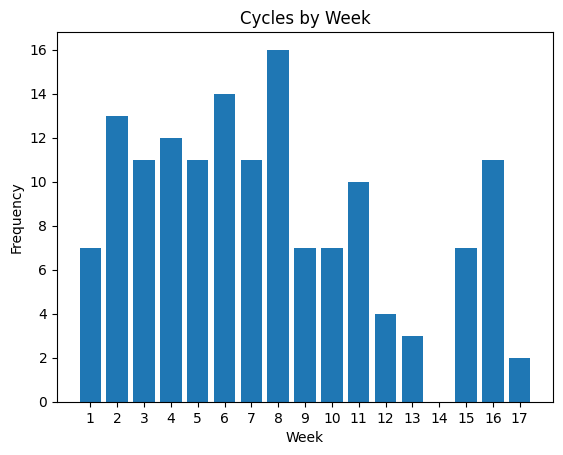

In [9]:
plt.bar(byweek['Week'], byweek['Frequency'])

plt.xlabel('Week')
plt.ylabel('Frequency')
plt.title('Cycles by Week')

plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.xticks(byweek['Week'])

plt.show()

Nice trend to see that as you get to the later weeks the cycles disappear likely due to having more information/clarity on how good teams are

Now, to turn them into CSVs

In [10]:
byseason.to_csv('cycles_by_season', index=False)

In [11]:
byweek.to_csv('cycles_by_week', index=False)